In [1]:
from css_utility import *
from wordcloud import WordCloud
import stylecloud
from collections import Counter

/home/lee/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
test_path="../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/"
test_filelist=[os.path.join(test_path,file) for file in os.listdir(test_path) if ".txt" in file]
test_filelist

['../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_EEEDD_5.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_GGGBB_8.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_BBBBB_5.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_CCCCC_3.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_FFFFB_10.txt',
 '../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_exp/motif_DFEEE_3.txt']

In [30]:
[word for word in test_path.split("/")[-2:] if word !=""][0]

'Ghexp_rpkm30_or_exp'

In [4]:
motifs={}
for file_name in test_filelist:
    motif, num_txt=file_name.split("/")[-1].split("_")[1:3]
    freq=num_txt.split(".")[0]
    motifs[motif]=int(freq)

In [5]:
motifs

{'EEEDD': 5, 'GGGBB': 8, 'BBBBB': 5, 'CCCCC': 3, 'FFFFB': 10, 'DFEEE': 3}

In [38]:
wc=WordCloud(width=800, height=400, background_color="white", colormap="viridis")
wordcloud=wc.generate_from_frequencies(motifs)

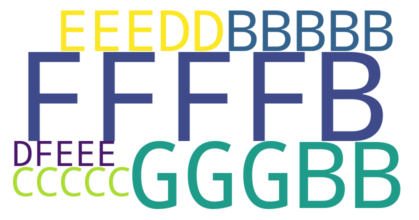

In [39]:
plt.figure(figsize=(6,2), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [181]:
def create_motif_wordcloud(path, color_map="viridis"):
    target=[word for word in path.split("/")[-2:] if word !=""][0]
    print("target", target)
    file_lst=[os.path.join(path,file) for file in os.listdir(path) if ".txt" in file]
    motifs={}
    for file_name in file_lst:
        motif, num_txt=file_name.split("/")[-1].split("_")[1:3]
        freq=num_txt.split(".")[0]
        motifs[motif]=int(freq)
    print("motifs = ", motifs)
    wc=WordCloud(width=800, height=400, background_color="white", colormap=color_map)
    wordcloud=wc.generate_from_frequencies(motifs)
    plt.figure(figsize=(6,2), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [182]:
path="../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm30_or_not/"

target Ghexp_rpkm30_or_not
motifs =  {'ABBBB': 5, 'FFFFF': 36, 'GBBBG': 3, 'EEDDD': 6, 'GGGGB': 13, 'FFFEE': 4, 'DEEEE': 5}


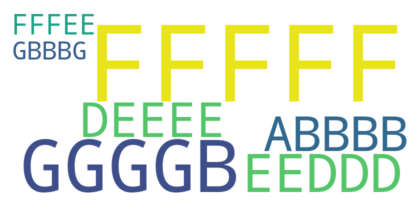

In [183]:
create_motif_wordcloud(path)

target Ghexp_rpkm10_or_not
motifs =  {'DDDDE': 12, 'EEGGE': 5, 'EEEDD': 7, 'GGGGG': 4, 'EEEEE': 4}


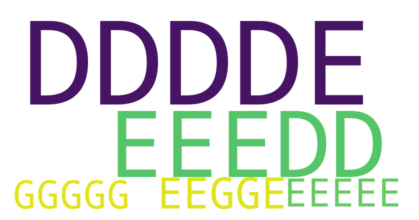

In [184]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm10_or_not/")

target Ghexp_rpkm10_or_exp
motifs =  {'EEEEE': 12, 'FFFFF': 5, 'BBBBB': 3, 'BGGGG': 4, 'DDDDEE': 5}


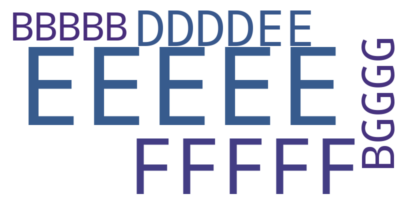

In [185]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm10_or_exp/")

target Ghexp_rpkm20_or_not
motifs =  {'EEEDD': 5, 'DDDDD': 9, 'BBBBA': 4, 'EEEGG': 3, 'GGGBB': 6, 'FFFFF': 5, 'BBGGG': 3, 'FFFDDD': 5, 'GGGEE': 11, 'EEEEE': 13, 'FFFDD': 10, 'EEEFF': 3, 'BBBBBB': 3}


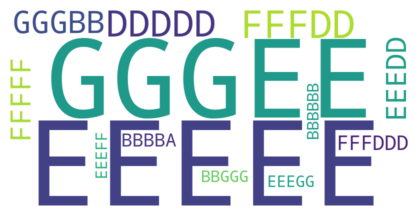

In [186]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm20_or_not/")

target Ghexp_rpkm20_or_exp
motifs =  {'EEEEE': 13, 'BBBBB': 4, 'GGBBB': 3, 'GGGGGG': 8}


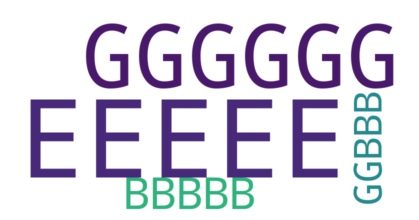

In [187]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm20_or_exp/")

target Ghexp_rpkm50_or_not
motifs =  {'FFFFF': 9, 'DEEEE': 5, 'DDDDD': 4, 'EEDDD': 5}


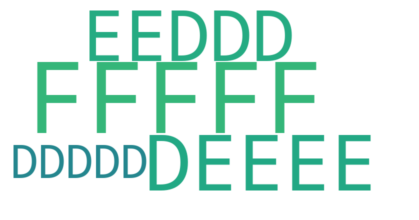

In [188]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm50_or_not/")

target Ghexp_rpkm50_or_exp
motifs =  {'DFFFF': 12, 'GGGGB': 5}


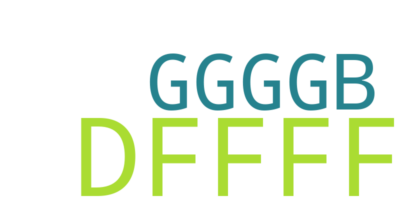

In [189]:
create_motif_wordcloud("../database/motif/gene_exp/4mer/test02_double_data/Ghexp_rpkm50_or_exp/")

**Fixing the size of the word according to the relative frequency**
gone fail..

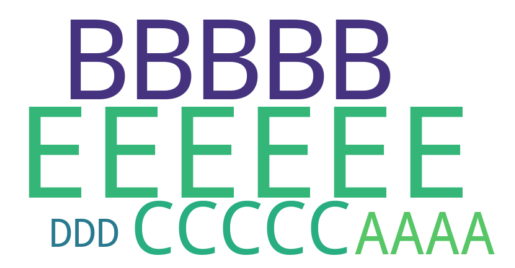

In [243]:
# Your word frequency dictionary
word_freqs = {"AAAA": 3, "BBBBB": 15, "CCCCC": 5, "DDD":1, "EEEEEE":20}

# Custom function to adjust font size based on frequency
def size_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return font_size * word_freqs[word] / sum(word_freqs.values())

# Create the WordCloud with a fixed random state and apply the custom font size function
random_integer = random.randint(1, 100)
wc = WordCloud(background_color="white", random_state=42, width=800, height=400, contour_width=size_func)
wc.generate_from_frequencies(word_freqs)
wc.recolor(color_func=None, random_state=None)

# Plot the WordCloud
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
hexa_state_col_dict

{'A': '#ff0000',
 'B': '#ff4500',
 'C': '#32cd32',
 'D': '#008000',
 'E': '#006400',
 'F': '#c2e105',
 'G': '#ffff00',
 'H': '#66cdaa',
 'I': '#8a91d0',
 'J': '#cd5c5c',
 'K': '#e9967a',
 'L': '#bdb76b',
 'M': '#808080',
 'N': '#c0c0c0',
 'O': '#f0f0f0'}

In [15]:
color_map_string=",".join(hexa_state_col_dict.values())

In [17]:
text = ' '.join([' '.join([motif]*count) for motif, count in motifs.items()])

In [18]:
text

'EEEDD EEEDD EEEDD EEEDD EEEDD GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB GGGBB BBBBB BBBBB BBBBB BBBBB BBBBB CCCCC CCCCC CCCCC FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB FFFFB DFEEE DFEEE DFEEE'

In [19]:
stylecloud.gen_stylecloud(text=text, size=1024, icon_name="fas fa-cloud", palette=color_map_string,
                         background_color="white", output_name="custom.png")

ModuleNotFoundError: No module named 'palettable.'